# In the name of God 
<p><b>Author: </b>Mohammadreza Mirzaei</p>
<p><b>Github: </b>https://github.com/MohammadrezaMirzaei</p>
<p><b>LinkedIn: </b>https://www.linkedin.com/in/mohammad-reza-mirzaei/</p>
<p><b>Email: </b>mirzaeimohammadreza98@gmail.com</p>

### Analyze the spatial-temporal distribution of bikeshare trips

In [2]:
pip install transbigdata -U

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install keplergl

In [1]:
import pandas as pd
import transbigdata as tbd

#### Get Data

In [2]:
data = pd.read_csv("metro-trips-2022-q3.csv")
data

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,19544,1,One Way,Walk-up,electric
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,24302,30,One Way,Monthly Pass,electric
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,19941,1,Round Trip,Walk-up,electric
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,17445,1,Round Trip,Walk-up,electric
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,19941,1,One Way,Walk-up,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,24053,30,One Way,Monthly Pass,electric
85167,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,13439,30,One Way,Monthly Pass,standard
85168,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,22800,30,Round Trip,Monthly Pass,electric
85169,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,22173,1,One Way,Walk-up,electric


In [3]:
data.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration
count,8.517100e+04,85171.000000,85171.000000,85165.000000,85165.000000,85171.000000,83461.000000,83461.000000,85171.000000,85171.000000
mean,2.042141e+08,40.209003,4020.993977,34.032587,-118.350081,3999.363856,34.032557,-118.351437,15848.158235,48.355825
std,4.161582e+06,113.279582,620.999930,0.041673,0.095419,629.172416,0.041041,0.096222,5817.846837,101.046307
min,1.977037e+08,1.000000,3000.000000,33.928459,-118.491341,3000.000000,33.928459,-118.491341,4727.000000,1.000000
25%,2.007132e+08,8.000000,3074.000000,33.996239,-118.451248,3068.000000,33.998341,-118.451630,13063.000000,1.000000
50%,2.036582e+08,17.000000,4215.000000,34.040310,-118.308853,4215.000000,34.039982,-118.309067,14954.000000,30.000000
75%,2.077635e+08,32.000000,4523.000000,34.051941,-118.258537,4516.000000,34.051899,-118.258537,21986.000000,30.000000
max,2.130630e+08,1440.000000,4632.000000,34.177650,-118.225410,4632.000000,34.177650,-118.225410,34231.000000,999.000000


In [4]:
#   ********** origin
lat, lon = 'start_lon','start_lat'
# Define the study area
bounds = [-118.491341, 33.928459, -118.225410, 34.177650]
# Delete the data out of the study area
data = tbd.clean_outofbounds(data,bounds = bounds,col = [lat, lon])
data

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,19544,1,One Way,Walk-up,electric
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,24302,30,One Way,Monthly Pass,electric
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,19941,1,Round Trip,Walk-up,electric
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,17445,1,Round Trip,Walk-up,electric
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,19941,1,One Way,Walk-up,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,24053,30,One Way,Monthly Pass,electric
85167,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,13439,30,One Way,Monthly Pass,standard
85168,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,22800,30,Round Trip,Monthly Pass,electric
85169,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,22173,1,One Way,Walk-up,electric


In [5]:
#Obtain the gridding parameters
params = tbd.area_to_params(bounds,accuracy = 1000)
params

{'slon': -118.491341,
 'slat': 33.928459,
 'deltalon': 0.010854555989507802,
 'deltalat': 0.008993210412845813,
 'theta': 0,
 'method': 'rect',
 'gridsize': 1000}

In [6]:
#Map the GPS data to grids
data['LONCOL'],data['LATCOL'] = tbd.GPS_to_grid(data[lon],data[lat],params)
data

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,LONCOL,LATCOL
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,19544,1,One Way,Walk-up,electric,14064,-16936
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,24302,30,One Way,Monthly Pass,electric,14058,-16927
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,19941,1,Round Trip,Walk-up,electric,14053,-16920
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,17445,1,Round Trip,Walk-up,electric,14053,-16920
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,19941,1,One Way,Walk-up,electric,14053,-16920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,24053,30,One Way,Monthly Pass,electric,14053,-16920
85167,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,13439,30,One Way,Monthly Pass,standard,14047,-16940
85168,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,22800,30,Round Trip,Monthly Pass,electric,14054,-16927
85169,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,22173,1,One Way,Walk-up,electric,14051,-16939


<AxesSubplot:>

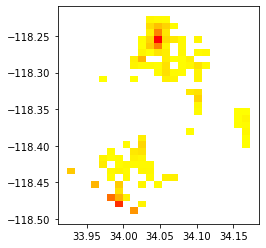

In [7]:
#Aggregate data into grids
grid_agg = data.groupby(['LONCOL','LATCOL'])['start_station'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['LONCOL'],grid_agg['LATCOL']],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'start_station',cmap = 'autumn_r')

In [8]:
#set to the hexagon grids
params['method'] = 'hexa'
#or set as triangle grids: params['method'] = 'tri'
#set a rotation angle (degree)
params['theta'] = 5

<AxesSubplot:>

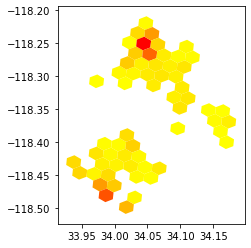

In [9]:
#Triangle and Hexagon grids requires three columns to store ID
data['loncol_1'],data['loncol_2'],data['loncol_3'] = tbd.GPS_to_grid(data[lon],data[lat],params)
#Aggregate data into grids
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['start_station'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3']],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'start_station',cmap = 'autumn_r')

In [10]:

# On windows, the path is written like this.
# Finally, pay attention to two slashes to prevent escape
tbd.set_imgsavepath(r'C:/Users/PCMRM/Dropbox/Bike Sharing/Codes')

Set imgsavepath success


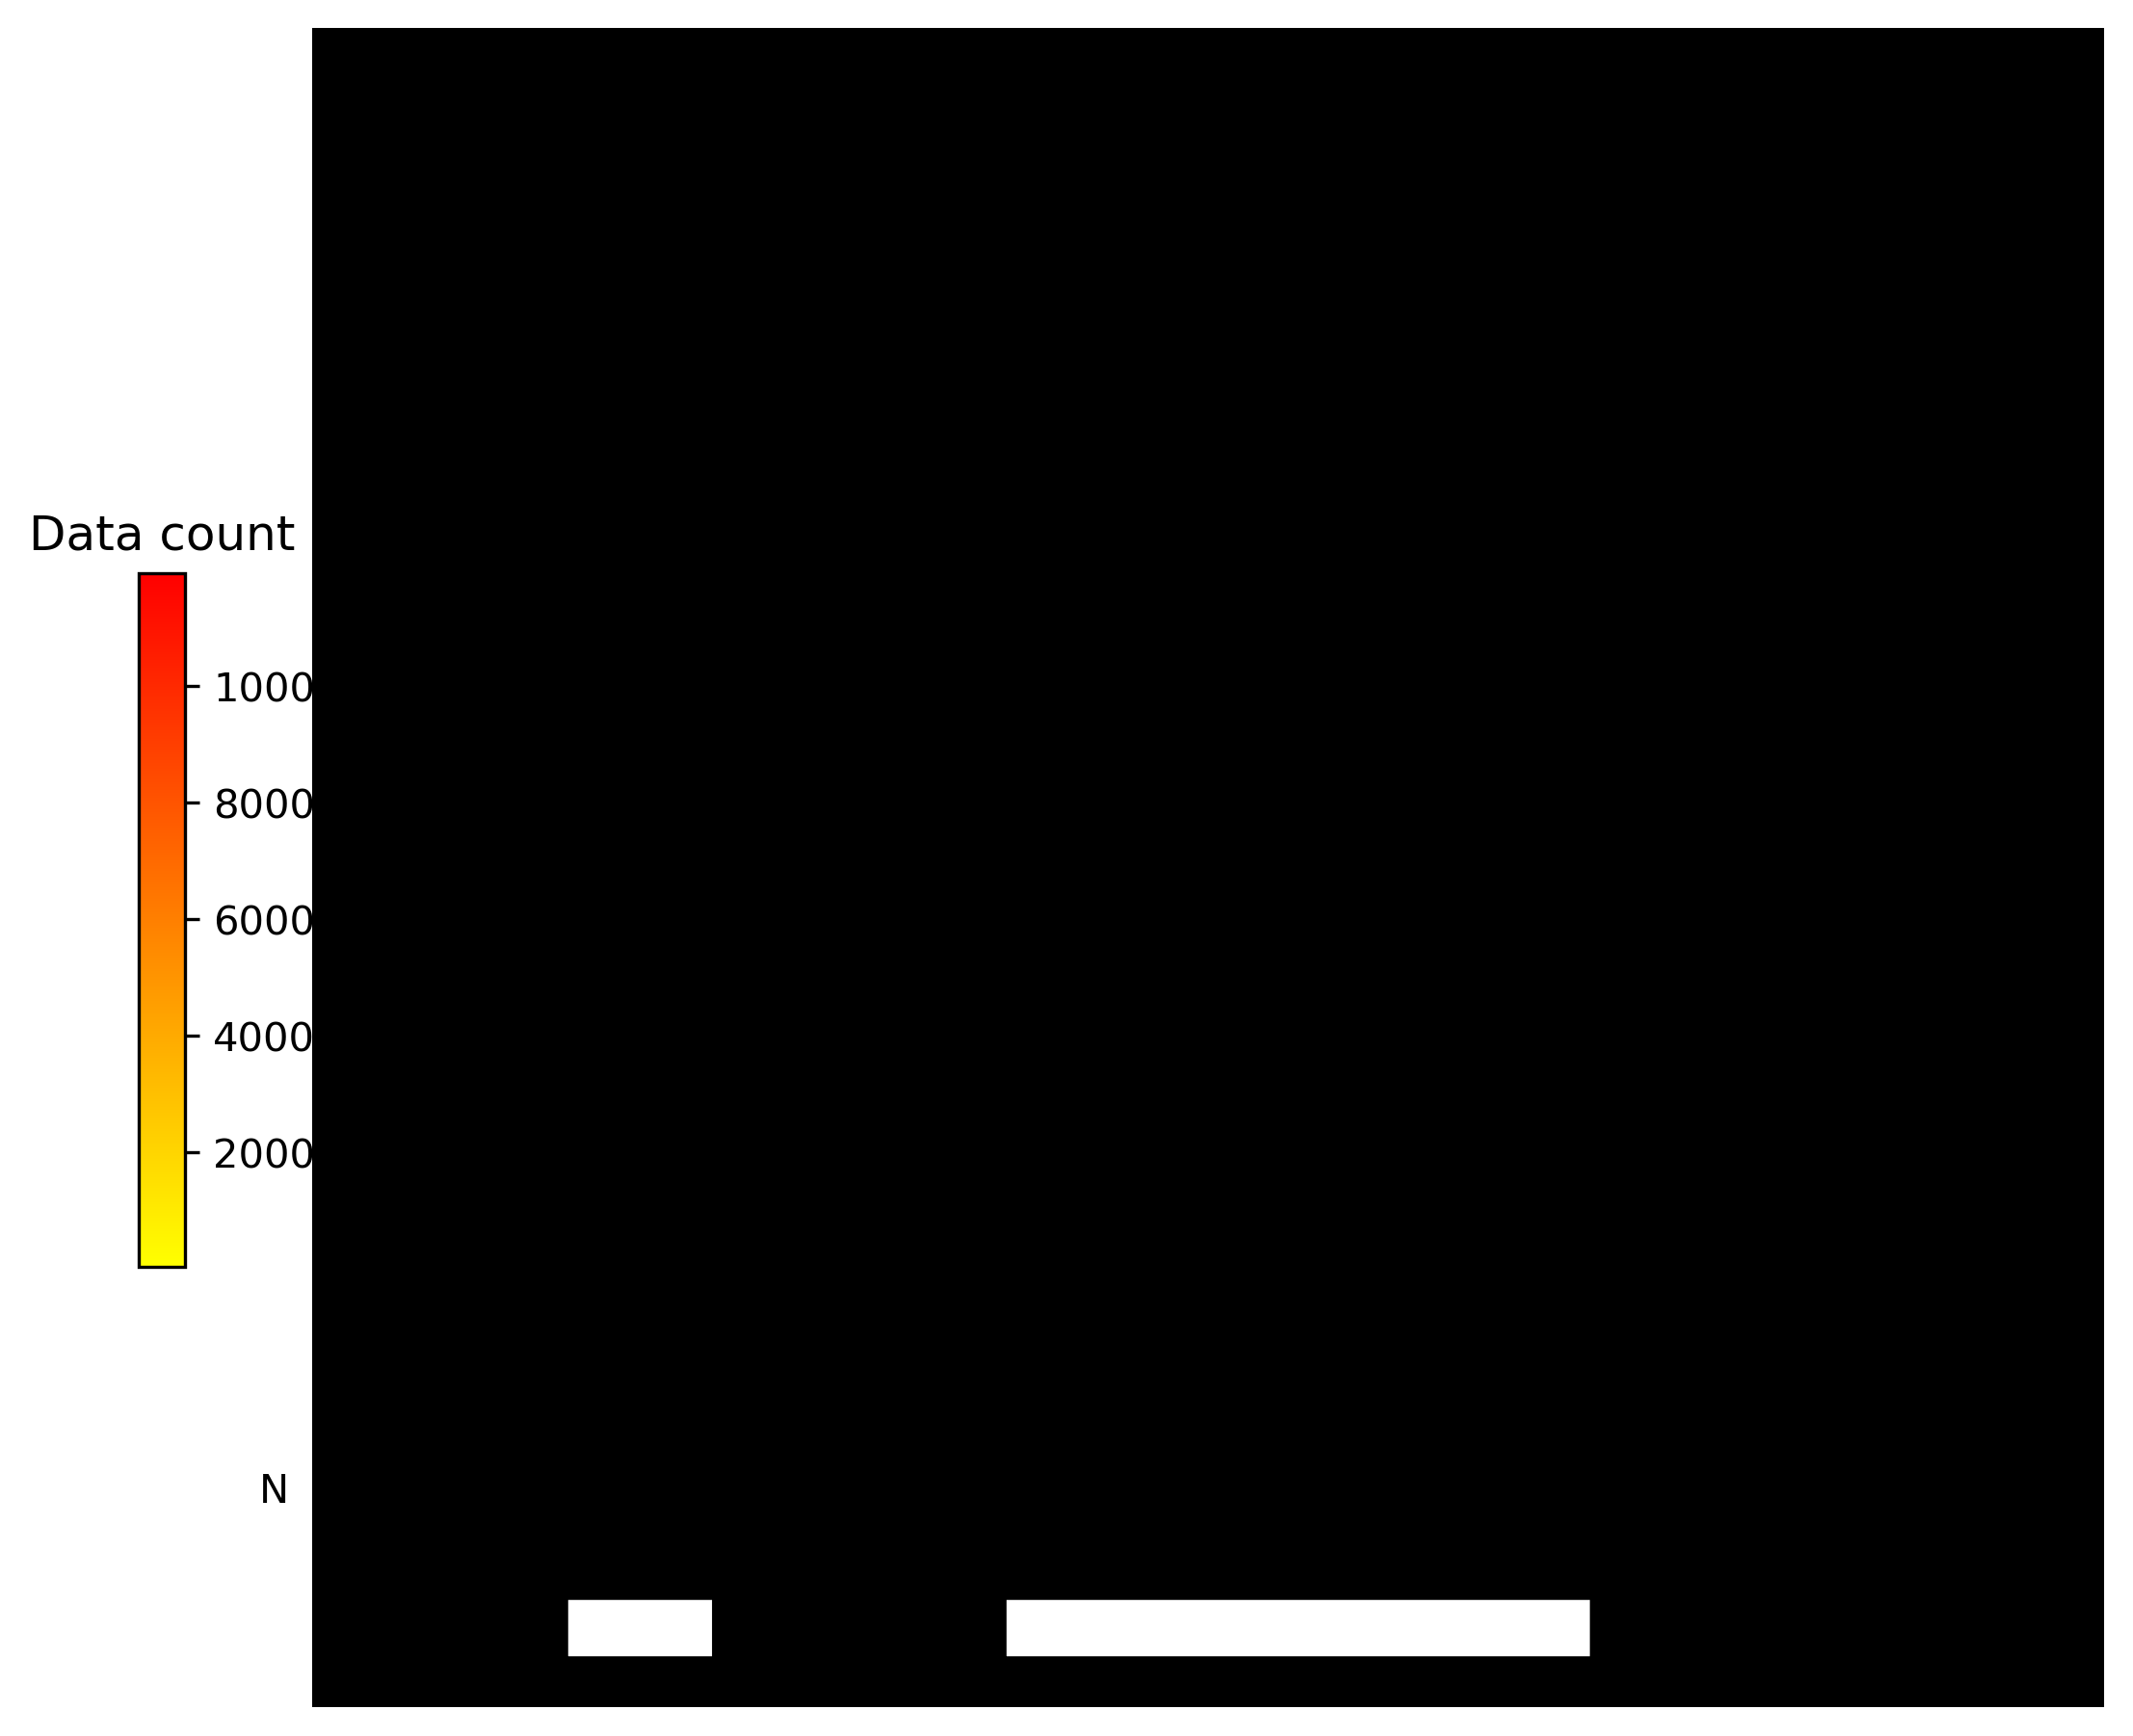

In [11]:
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)
#Load basemap
tbd.plot_map(plt,bounds,zoom = 11,style = 4)
#Define colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Data count')
plt.sca(ax)
#Plot the data
grid_agg.plot(column = 'start_station',cmap = 'autumn_r',ax = ax,cax = cax,legend = True)
#Add scale
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

In [ ]:
tbd.visualization_data(data, col = [lon, lat], accuracy=1000, height=500)

In [13]:
pip install folium

     ------------------------------------- 102.3/102.3 kB 65.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import folium

In [15]:
from folium.plugins import HeatMapWithTime

In [16]:
df = pd.read_csv("metro-trips-2022-q3.csv")
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,19544,1,One Way,Walk-up,electric
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,24302,30,One Way,Monthly Pass,electric
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,19941,1,Round Trip,Walk-up,electric
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,17445,1,Round Trip,Walk-up,electric
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,19941,1,One Way,Walk-up,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,24053,30,One Way,Monthly Pass,electric
85167,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,13439,30,One Way,Monthly Pass,standard
85168,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,22800,30,Round Trip,Monthly Pass,electric
85169,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,22173,1,One Way,Walk-up,electric


In [19]:
df.start_time = pd.to_datetime(df.start_time, format='%m/%d/%Y %H:%M')
df['month'] = df.start_time.apply(lambda x: x.month)
df['week'] = df.start_time.apply(lambda x: x.week)
df['day'] = df.start_time.apply(lambda x: x.day)
df['hour'] = df.start_time.apply(lambda x: x.hour)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              85171 non-null  int64         
 1   duration             85171 non-null  int64         
 2   start_time           85171 non-null  datetime64[ns]
 3   end_time             85171 non-null  object        
 4   start_station        85171 non-null  int64         
 5   start_lat            85165 non-null  float64       
 6   start_lon            85165 non-null  float64       
 7   end_station          85171 non-null  int64         
 8   end_lat              83461 non-null  float64       
 9   end_lon              83461 non-null  float64       
 10  bike_id              85171 non-null  int64         
 11  plan_duration        85171 non-null  int64         
 12  trip_route_category  85171 non-null  object        
 13  passholder_type      85171 non-

In [24]:
def generateBaseMap(default_location=[34.032587, -118.350081], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [25]:
base_map = generateBaseMap()
base_map

In [23]:
from folium.plugins import HeatMap

In [45]:
grid_agg = df.groupby(['start_lat', 'start_lon'])['start_station'].count().reset_index()
base_map = generateBaseMap()
mapss = HeatMap(data=grid_agg.values.tolist(), radius=20, max_zoom=11).add_to(base_map)
base_map

In [ ]:
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [ ]:
from folium.plugins import HeatMapWithTime

In [36]:
df['count'] = 1
df_hour_list = []
for hour in df.hour.sort_values().unique():
    df_hour_list.append(df.loc[df.hour == hour, ['start_lat', 'start_lon', 'count']].groupby(['start_lat', 'start_lon']).sum().reset_index().values.tolist())

In [47]:
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map